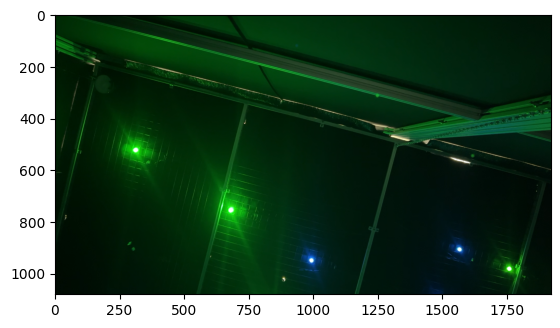

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
imBGR=cv2.imread('/Users/antoniahoffman/Images/opencv_frame_56FF.png')
imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)
plt.imshow(imRGB)

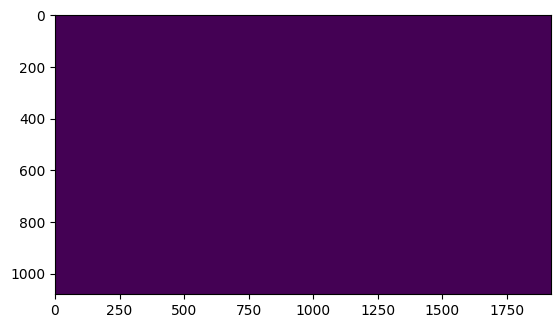

In [94]:
imHSV=cv2.cvtColor(imRGB, cv2.COLOR_RGB2HSV)
h,s,v=cv2.split(imHSV)

HSVBlueMin=(0,0, 0)
HSVBlueMax=(255,255,255)

HSVGreenMin=(100,80,40)
HSVGreenMax=(140,100,100)

HSVBlueMask=cv2.inRange(imHSV, HSVBlueMin, HSVBlueMax)
plt.imshow(HSVBlueMask)
HSVGreenMask=cv2.inRange(imHSV, HSVGreenMin, HSVGreenMax)
plt.imshow(HSVGreenMask)
#print(v.max())

Blue Thresholding - I can't figure out how to combine masks

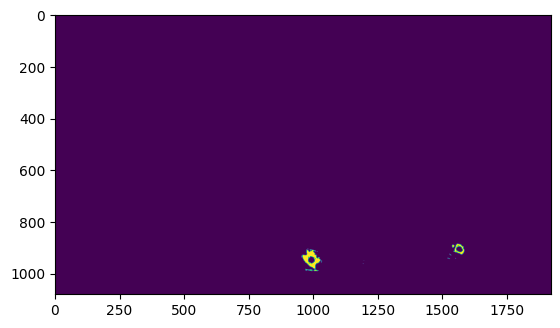

In [95]:
bMin=(0,0,100)
bMax=(255,100,255)
blueMask=cv2.inRange(imRGB, bMin, bMax)
result1=cv2.bitwise_and(imRGB, imRGB, mask=blueMask)
#plt.imshow(result1)
plt.imshow(blueMask)

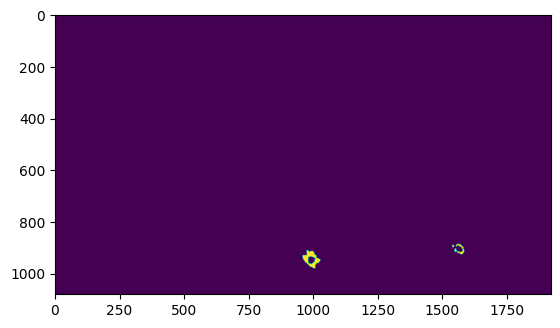

In [78]:
kernel=np.ones((5,5), np.uint8)
eroded=cv2.erode(blueMask, kernel, iterations=1)
dilated=cv2.dilate(eroded,kernel, iterations=1)
#plt.imshow(np.hstack([eroded, dilated]))
plt.imshow(dilated)


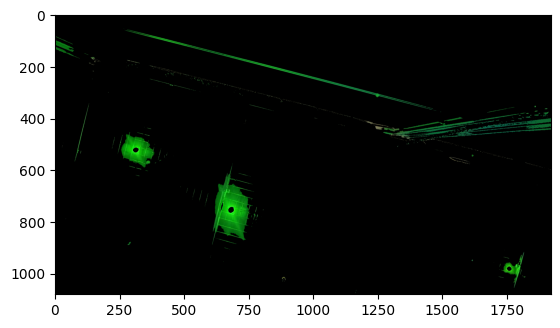

In [102]:
gMin=(0,100,0)
gMax=(255,255,100)
mask=cv2.inRange(imRGB, gMin, gMax)
result1=cv2.bitwise_and(imRGB, imRGB, mask=mask)
plt.imshow(result1)


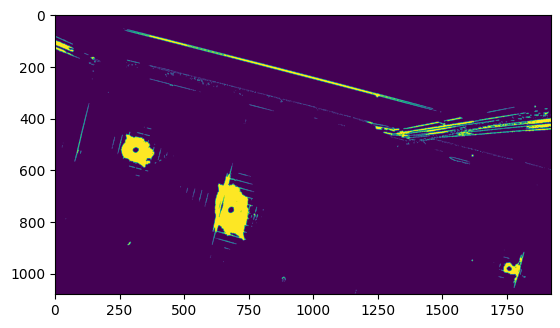

In [97]:
plt.imshow(mask)

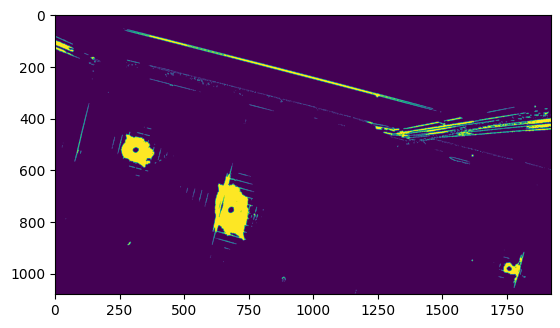

In [99]:
from skimage import morphology
cleaned = morphology.remove_small_objects(mask, min_size=64, connectivity=1)
plt.imshow(cleaned)
from scipy.ndimage import binary_opening
opened=binary_opening()

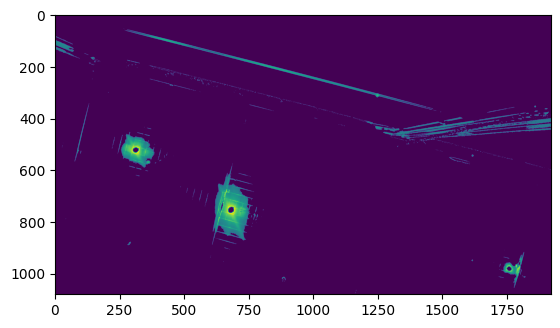

In [33]:
res1HSV=cv2.cvtColor(result1, cv2.COLOR_RGB2HSV)
h1,s1,v1=cv2.split(res1HSV)
plt.imshow(v1)

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'GaussianBlur'
> Overload resolution failed:
>  - GaussianBlur() missing required argument 'sigmaX' (pos 3)
>  - GaussianBlur() missing required argument 'sigmaX' (pos 3)


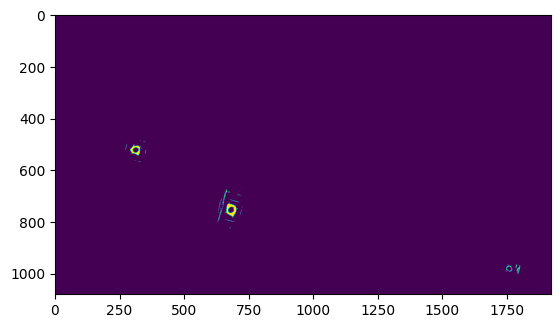

In [61]:
vThresh=200

ret,thresh3 = cv2.threshold(v1,vThresh,255,cv2.THRESH_BINARY)
plt.imshow(thresh3)
median3=cv2.GaussianBlur(thresh3, 15)
plt.imshow(median3)

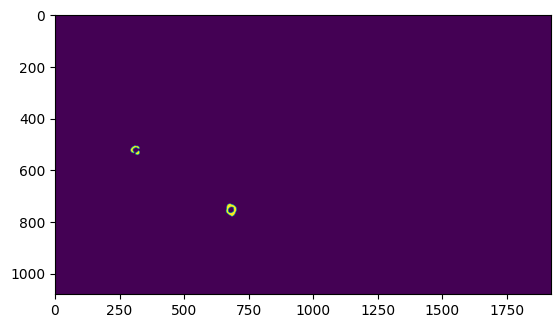

In [101]:
plt.imshow(cv2.bitwise_and(median3, mask))

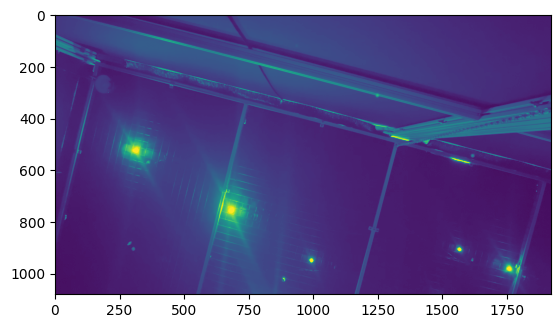

In [6]:
r,g,b=cv2.split(imRGB)
plt.imshow(g)

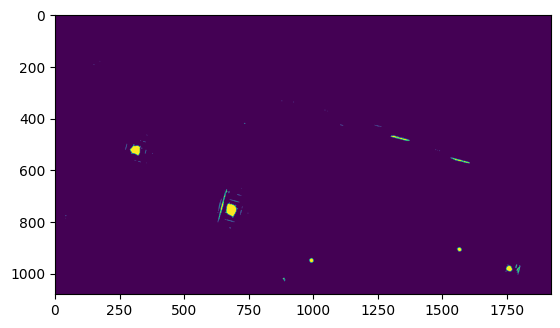

In [10]:
gThresh=200

ret,thresh1 = cv2.threshold(g,gThresh,255,cv2.THRESH_BINARY)
plt.imshow(thresh1)


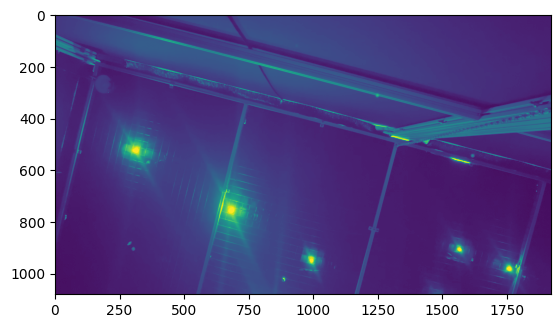

In [14]:
imHSV=cv2.cvtColor(imRGB, cv2.COLOR_RGB2HSV)
#plt.imshow(imHSV)
h,s,v=cv2.split(imHSV)
plt.imshow(v)

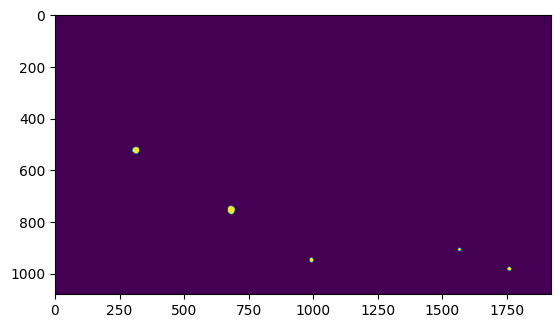

In [63]:
vThresh=230

ret,thresh2 = cv2.threshold(v,vThresh,255,cv2.THRESH_BINARY)
plt.imshow(thresh2)
median2=cv2.medianBlur(thresh2, 15)
plt.imshow(median2)

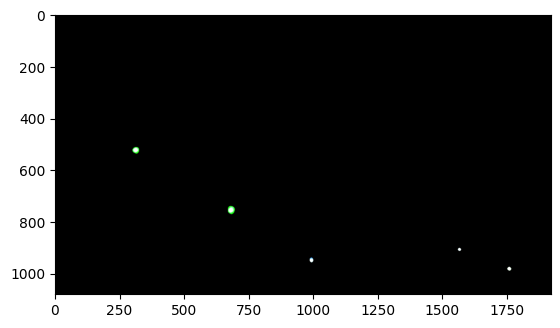

In [64]:
result1=cv2.bitwise_and(imRGB, imRGB, mask=median2)
plt.imshow(result1)

In [19]:
mask2=mask+thresh2

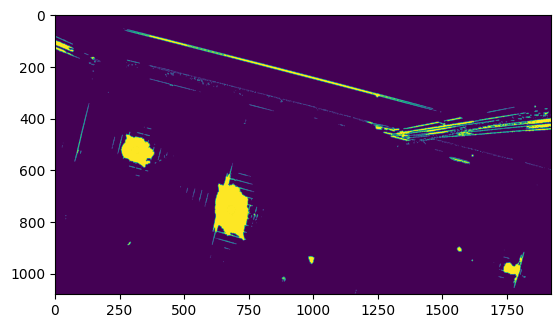

In [20]:
plt.imshow(mask2)

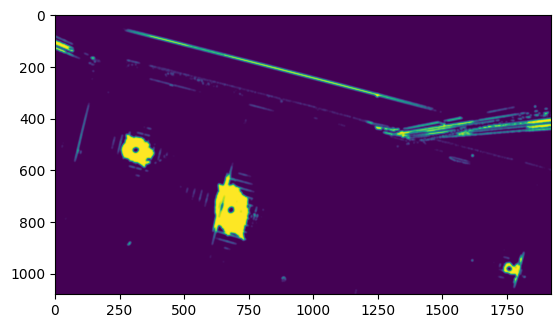

In [23]:
plt.imshow(mask)
blur=cv2.GaussianBlur(mask, (15,15),0)
plt.imshow(blur)


x:313, y:524, r:13
x:680, y:757, r:14
x:1754, y:982, r:8
x:994, y:947, r:11
x:1562, y:908, r:7


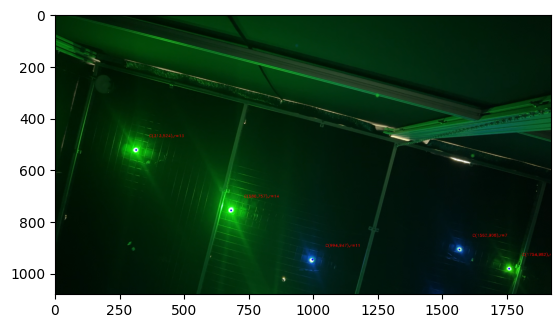

In [79]:
output=imRGB.copy()
circles = cv2.HoughCircles(median2,cv2.HOUGH_GRADIENT,1.5,200,param1=100,param2=10,minRadius=1,maxRadius=20)
circles = np.round(circles[0, :]).astype("int")
for (x, y, r) in circles:
  print(f'x:{x}, y:{y}, r:{r}')
  cv2.circle(output, (x, y), r, (0, 255, 0), 1)
  cv2.circle(output, (x, y), 2, (0, 0, 255), 2)
  cv2.putText(output,f'C({x},{y}),r={r}',(x+50,y-50),fontFace = cv2.FONT_HERSHEY_DUPLEX,fontScale = .5, color = (255, 0, 0),thickness = 1)
  dCircle=2*r
plt.imshow(output)


In [46]:
blueMask=cv2.GaussianBlur(blueMask, (15,15),0)

2378
5842
528
163
243


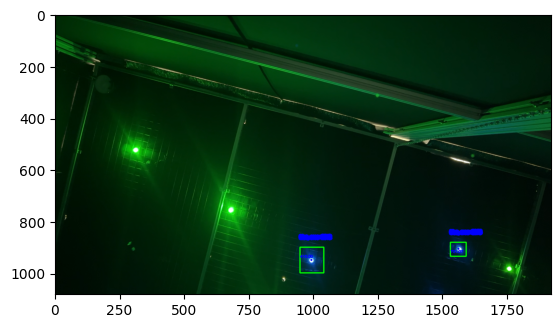

In [55]:
output=cv2.connectedComponentsWithStats(blueMask,4,cv2.CV_32S)
imCentre=[imRGB.shape[1]/2.,imRGB.shape[0]/2.]
numLabels=output[0]
labels=output[1]
stats=output[2]
centroids=output[3]
outIm=imRGB.copy()
for i in range(1,numLabels):
  x = stats[i, cv2.CC_STAT_LEFT]
  y = stats[i, cv2.CC_STAT_TOP]
  w = stats[i, cv2.CC_STAT_WIDTH]
  h = stats[i, cv2.CC_STAT_HEIGHT]
  area = stats[i, cv2.CC_STAT_AREA]
  if (area>1000):
    (cX, cY) = centroids[i]
    diffX=cX-imCentre[0]
    diffY=cY-imCentre[1]
    diffR=(diffX**2+diffY**2)**0.5
    cv2.rectangle(outIm, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv2.circle(outIm, (int(cX), int(cY)), 4, (0, 0, 255), -1)
    cv2.putText(outIm, f'blue, area={area}', (x, y - 35), cv2.FONT_HERSHEY_SIMPLEX, .45, (0, 0, 255), 15)
    cv2.putText(outIm, f'{diffR:.2f}', (x, y + 40), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
plt.imshow(outIm)

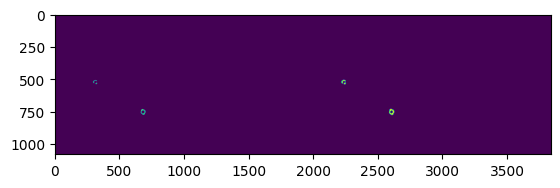

In [59]:
kernel=np.ones((5,5), np.uint8)
eroded=cv2.erode(median3, kernel, iterations=1)
dilated=cv2.dilate(eroded,kernel, iterations=1)
plt.imshow(np.hstack([eroded, dilated]))


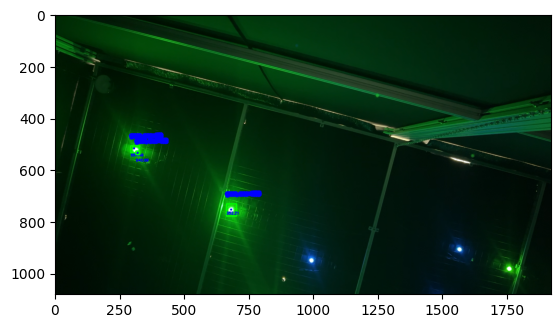

In [60]:
output=cv2.connectedComponentsWithStats(dilated,4,cv2.CV_32S)
numLabels=output[0]
labels=output[1]
stats=output[2]
centroids=output[3]
outIm=imRGB.copy()
for i in range(1,numLabels):
  x = stats[i, cv2.CC_STAT_LEFT]
  y = stats[i, cv2.CC_STAT_TOP]
  w = stats[i, cv2.CC_STAT_WIDTH]
  h = stats[i, cv2.CC_STAT_HEIGHT]
  area = stats[i, cv2.CC_STAT_AREA]
  
  (cX, cY) = centroids[i]
  diffX=cX-imCentre[0]
  diffY=cY-imCentre[1]
  diffR=(diffX**2+diffY**2)**0.5
  cv2.rectangle(outIm, (x, y), (x + w, y + h), (0, 255, 0), 3)
  cv2.circle(outIm, (int(cX), int(cY)), 4, (0, 0, 255), -1)
  cv2.putText(outIm, f'green, area={area}', (x, y - 35), cv2.FONT_HERSHEY_SIMPLEX, .45, (0, 0, 255), 15)
  cv2.putText(outIm, f'{diffR:.2f}', (x, y + 40), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
plt.imshow(outIm)